<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1ec0ef52393c14b96ea085f2bb171f4e6a396c76ca66621662a5adc21ac6835a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


6.357583418808163


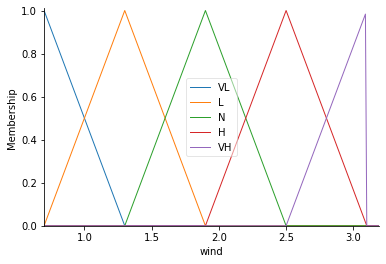

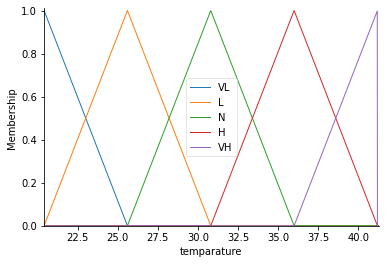

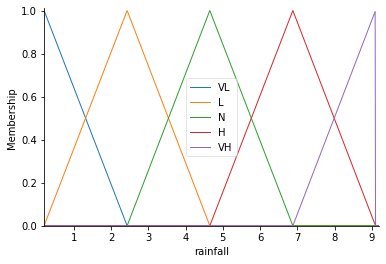

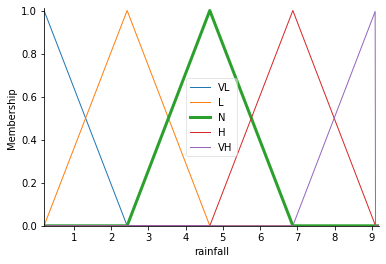

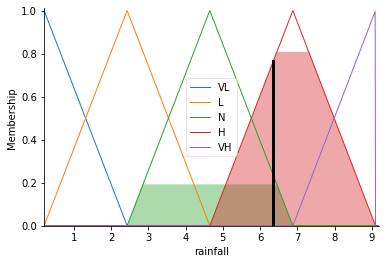

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind=ctrl.Antecedent(np.arange(0.7,3.2,0.01),'wind')
temparature = ctrl.Antecedent(np.arange(20.4,41.3,0.01),'temparature')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.01),'rainfall')

wind['VL']=fuzz.trimf(wind.universe,[0.7,0.7,1.3])
wind['L']=fuzz.trimf(wind.universe,[0.7,1.3,1.9])
wind['N']=fuzz.trimf(wind.universe,[1.3,1.9,2.5])
wind['H']=fuzz.trimf(wind.universe,[1.9,2.5,3.1])
wind['VH']=fuzz.trimf(wind.universe,[2.5,3.1,3.1])

temparature['VL']=fuzz.trimf(temparature.universe,[20.4,20.4,25.6])
temparature['L']=fuzz.trimf(temparature.universe,[20.4,25.6,30.8])
temparature['N']=fuzz.trimf(temparature.universe,[25.6,30.8,36])
temparature['H']=fuzz.trimf(temparature.universe,[30.8,36,41.2])
temparature['VH']=fuzz.trimf(temparature.universe,[36,41.2,41.2])

rainfall['VL']=fuzz.trimf(rainfall.universe,[0.2,0.2,2.43])
rainfall['L']=fuzz.trimf(rainfall.universe,[0.2,2.43,4.65])
rainfall['N']=fuzz.trimf(rainfall.universe,[2.43,4.65,6.88])
rainfall['H']=fuzz.trimf(rainfall.universe,[4.65,6.88,9.1])
rainfall['VH']=fuzz.trimf(rainfall.universe,[6.88,9.1,9.1])

wind.view()
temparature.view()
rainfall.view()
rainfall['N'].view()

rule1=ctrl.Rule(wind['VL'] & temparature['VL'],rainfall['VL'])
rule2=ctrl.Rule(wind['VL'] & temparature['L'],rainfall['VL'])
rule3=ctrl.Rule(wind['VL'] & temparature['N'],rainfall['L'])
rule4=ctrl.Rule(wind['VL'] & temparature['H'],rainfall['L'])
rule5=ctrl.Rule(wind['VL'] & temparature['VH'],rainfall['N'])
rule6=ctrl.Rule(wind['L'] & temparature['VL'],rainfall['VL'])
rule7=ctrl.Rule(wind['L'] & temparature['L'],rainfall['L'])
rule8=ctrl.Rule(wind['L'] & temparature['N'],rainfall['L'])
rule9=ctrl.Rule(wind['L'] & temparature['H'],rainfall['N'])
rule10=ctrl.Rule(wind['L'] & temparature['VH'],rainfall['H'])
rule11=ctrl.Rule(wind['N'] & temparature['VL'],rainfall['VL'])
rule12=ctrl.Rule(wind['N'] & temparature['L'],rainfall['L'])
rule13=ctrl.Rule(wind['N'] & temparature['N'],rainfall['N'])
rule14=ctrl.Rule(wind['N'] & temparature['H'],rainfall['N'])
rule15=ctrl.Rule(wind['N'] & temparature['VH'],rainfall['H'])
rule16=ctrl.Rule(wind['H'] & temparature['VL'],rainfall['L'])
rule17=ctrl.Rule(wind['H'] & temparature['L'],rainfall['N'])
rule18=ctrl.Rule(wind['H'] & temparature['N'],rainfall['N'])
rule19=ctrl.Rule(wind['H'] & temparature['H'],rainfall['H'])
rule20=ctrl.Rule(wind['H'] & temparature['VH'],rainfall['VH'])
rule21=ctrl.Rule(wind['VH'] & temparature['VL'],rainfall['N'])
rule22=ctrl.Rule(wind['VH'] & temparature['L'],rainfall['N'])
rule23=ctrl.Rule(wind['VH'] & temparature['N'],rainfall['H'])
rule24=ctrl.Rule(wind['VH'] & temparature['H'],rainfall['VH'])
rule25=ctrl.Rule(wind['VH'] & temparature['VH'],rainfall['VH'])


rainfall_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
Rainfall=ctrl.ControlSystemSimulation(rainfall_ctrl)
Rainfall.input['wind']=2.5
Rainfall.input['temparature']=35
Rainfall.compute()
print(Rainfall.output['rainfall'])
rainfall.view(sim=Rainfall)